In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import IPython.display as ipd
import statsmodels.api as stm
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,7)
from sklearn import preprocessing

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,
                            classification_report, roc_curve, roc_auc_score, auc
from sklearn.svm import SVR
from sklearn import metrics

## Import Data and Split Development & Evaluation Set

#### - Attribute name and file path depend on you

In [3]:
##### Data All #####
data = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Thesis_/Data_all.csv')
data_spotify = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_spotifyth.csv')
emo_pred_MLR = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Emotion_mfcc_all.csv')

VA_test = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_test1.csv')

### Development Set of MediaEval2013 ###
dev_set = data[data['Mediaeval 2013 Set']=='Development'] 

# No Pitch (Dev)
dev_set_nopitch = dev_set[['Dynamic','Tempo', 'Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]

# No Tempo (Dev)
dev_set_notempo = dev_set[['Pitch','Dynamic', 'Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]
# No Pitch & Tempo (Dev)
dev_set_no_pt = dev_set[['Dynamic','Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]

# No All (Dev)
dev_set_no_all = dev_set[[ 'Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]


### Evaluate Set of MediaEval2013 ###
eva_set = data[data['Mediaeval 2013 Set']=='Evaluation'] 

# No Pitch (Evaluate)
eva_set_nopitch = eva_set[['Dynamic','Tempo', 'Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]
# No Tempo (Evaluate)
eva_set_notempo = eva_set[['Pitch','Dynamic', 'Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]
# No Pitch & Tempo (Evaluate)
eva_set_no_pt = eva_set[['Dynamic','Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]

# No All (Evaluate)
eva_set_no_all = eva_set[[ 'Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]

### Valence Arousal from SVR (MediaEval) ###
data_SVR = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_SVR.csv')
data_SVR2 = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_SVR2.csv')
data_SVR3 = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_SVR3.csv')
data_SVR4 = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_SVR4.csv')

## Import Data Thai Songs

In [4]:
##### Data Thai All #####
data_th = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Thesis_/Data_Thai.csv')

# No Pitch (Thai)
data_th_nopitch = data_th[['Dynamic','Tempo','Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]

# No Tempo (Thai)
data_th_notempo = data_th[['Pitch','Dynamic', 'Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]
# No Pitch & Tempo (Thai)
data_th_no_pt = data_th[['Dynamic','Chroma_mean[1]','Chroma_mean[2]','Chroma_mean[3]','Chroma_mean[4]','Chroma_mean[5]'
                          ,'Chroma_mean[6]','Chroma_mean[7]','Chroma_mean[8]','Chroma_mean[9]','Chroma_mean[10]','Chroma_mean[11]','Chroma_mean[12]']]

## Plot VA : Features

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000181C0940>],
      dtype=object)

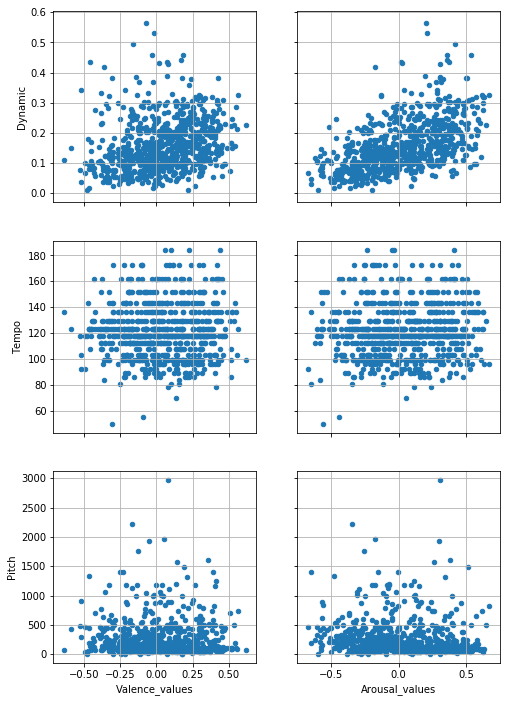

In [9]:
fig, axes = plt.subplots(nrows = 3, ncols = 2,figsize=(8, 12))
data.plot(x = 'Valence_values',y = 'Dynamic',kind = 'scatter',
          style='^',grid='True',subplots = True,ax = axes[0,0],sharey = True)
data.plot(x = 'Arousal_values',y = 'Dynamic',kind = 'scatter',
          style='^',grid='True',subplots = True,ax = axes[0,1],sharex = True)
data.plot(x = 'Valence_values',y = 'Tempo',kind = 'scatter',
          style='^',grid='True',subplots = True,ax = axes[1,0])
data.plot(x = 'Arousal_values',y = 'Tempo',kind = 'scatter',
          style='^',grid='True',subplots = True,ax = axes[1,1])
data.plot(x = 'Valence_values',y = 'Pitch',kind = 'scatter',
          style='^',grid='True',subplots = True,ax = axes[2,0])
data.plot(x = 'Arousal_values',y = 'Pitch',kind = 'scatter',
          style='^',grid='True',subplots = True,ax = axes[2,1])


## Split Features Values and VA Values to Training-Testing Set

In [5]:
##### Valence Arousal Values of MediaEval All #####
VA_all = data.iloc[:,1:3].values #All Valence and Arousal values 744 songs
VA_valence = data.iloc[:,1:2].values #All Valence values 744 songs
VA_arousal = data.iloc[:,2:3].values #All Arousal values 744 songs

# VA Spotify #
VA_spotify = data_spotify.iloc[:,3:5].values
VA_spotify_normal = preprocessing.minmax_scale(VA_spotify) #Normalize

# VA MediaEval from SVR # 
VA_all_SVR = data_SVR.iloc[:,:].values
VA_all_SVR2 = data_SVR2.iloc[:,:].values
VA_all_SVR3 = data_SVR3.iloc[:,:].values
VA_all_SVR4 = data_SVR4.iloc[:,:].values

X_all = data.iloc[:,3:18].values #All features of MediaEval 744 songs

### X_thai features set ###
X_thai_all = data_th.iloc[0:125,6:21].values #All Thai songs features (No Number of Songs)
X_thai_no_pitch = data_th_nopitch.iloc[:,:].values #No Pitch Thai songs  (Past Name is called X_thai2)
X_thai_no_tempo = data_th_notempo.iloc[:,:].values #No Tempo Thai songs (Past Named is called X_thai3)
X_thai_no_pitchtempo = data_th_no_pt.iloc[0:125,0:13].values #No Pitch & Tempo Thai songs(Past Named is called X_thai4)


#######################################################################

### X_train each features set ###
X_train_all = dev_set.iloc[:,3:18].values #All Features Values  (Training)
X_train_no_pitch = dev_set_nopitch.iloc[:,:].values #No Pitch Development songs  (Past Name is called X_train2)
X_train_no_tempo = dev_set_notempo.iloc[:,:].values #No Tempo Development songs  (Past Name is called X_train3)
X_train_no_pitchtempo = dev_set_no_pt.iloc[:,:].values #No Pitch & Tempo Development songs  (Past Name is called X_train4)
X_train_no_all = dev_set_no_all.iloc[:,:].values #No All Development songs  

### X_test each features set ###
X_test_all = eva_set.iloc[:,3:18].values #Features Values (Testing)
X_test_no_pitch = eva_set_nopitch.iloc[:,:].values #No Pitch Evaluation songs  (Past Name is called X_test2)
X_test_no_tempo = eva_set_notempo.iloc[:,:].values #No Tempo Evaluation songs  (Past Name is called X_test3)
X_test_no_pitchtempo = eva_set_no_pt.iloc[:,:].values #No Pitch & Tempo Evaluation songs  (Past Name is called X_train4)
X_test_no_all = eva_set_no_all.iloc[:,:].values #No All Evaluation songs 

#######################################################################

### Each of MediaEval Valence Arousal values ###
y_va_all = data.iloc[:,1:3].values #Valence and Arousal values (All)
y_train = dev_set.iloc[:,1:3].values #Valence and Arousal values (Training)
y_test = eva_set.iloc[:,1:3].values #Valence and Arousal values (Testing)

#######################################################################

### Each of MediaEval annotations ###
y_emo_all = data.iloc[:,-3].values # All Valence and Arousal annotations (All)
y_emo_train = dev_set.iloc[:,-3].values #Valence and Arousal annotations (Training)
y_emo_test = eva_set.iloc[:,-3].values #Valence and Arousal annotations (Testing)

#######################################################################

### Seperate Valence and Arousal for each set ###
y_val_all = data.iloc[:,1:2].values #Valence values 744 songs
y_arou_all = data.iloc[:,2:3].values #Arousal values 744 songs 


y_val_train = dev_set.iloc[:,1:2].values #Valence values (Training)
y_val_test = eva_set.iloc[:,1:2].values #Valence values (Testing)

y_arou_train = dev_set.iloc[:,2:3].values #Arousal values (Training)
y_arou_test = eva_set.iloc[:,2:3].values #Arousal values (Training)

emo_all =  emo_pred_MLR.iloc[:,-5].values
emo_no_pitch = emo_pred_MLR.iloc[:,-4].values
emo_no_tempo = emo_pred_MLR.iloc[:,-3].values
emo_no_pitchtempo = emo_pred_MLR.iloc[:,-2].values
emo_no_all = emo_pred_MLR.iloc[:,-1].values

In [104]:
len(X_thai_no_pitchtempo)

125

## Seperate Emotions for ROC 

In [15]:
def roc_mlr():
    
    n_classes = 4
    emo_mediaeval = pd.read_csv('Emotion_all_MLR.csv')
    emo_mediaeval_happy = emo_mediaeval[emo_mediaeval.Actual=='Happy']
    emo_mediaeval_all = emo_mediaeval.iloc[:,-4].values
    emo_happy = emo_mediaeval_happy.iloc[:,:].values

    df = pd.DataFrame(emo_happy, columns=['Actual','All', 'No Pitch',
                                          'No Tempo', 'No Pitch+Tempo'])

    y_pred_mlr_bi = label_binarize(emo_mediaeval_all, classes=['Happy',
                                                               'Excited',
                                                               'Sad',
                                                               'Peaceful'])
    y_emo_test_bi = label_binarize(y_emo_test, classes=['Happy',
                                                        'Excited',
                                                        'Sad',
                                                        'Peaceful'])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_emo_test_bi[:, i],
                                      y_pred_mlr_bi[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_emo_test_bi.ravel(),
                                              y_pred_mlr_bi.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    #Plot median line
    plt.figure(figsize=(12,9))
    #plt.plot(fpr["micro"], tpr["micro"],label='ROC average (area = {0:0.2f})'
               #''.format(roc_auc["micro"]))
    
    #Plot Roc of emotions
    plt.plot(fpr[0], tpr[0], label='Happy (area = {1:0.2f})'
                                   ''.format(i, roc_auc[0]))
    plt.plot(fpr[1], tpr[1], label='Excited (area = {1:0.2f})'
                                   ''.format(i, roc_auc[1]))
    plt.plot(fpr[2], tpr[2], label='Sad (area = {1:0.2f})'
                                   ''.format(i, roc_auc[2]))
    plt.plot(fpr[3], tpr[3], label='Peaceful (area = {1:0.2f})'
                                   ''.format(i, roc_auc[3]))
    
    plt.grid()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of Multiple Linear Regression : All')
    plt.legend(loc="lower right", fontsize='xx-large')
    plt.show()

    print len(emo_mediaeval_all)
    


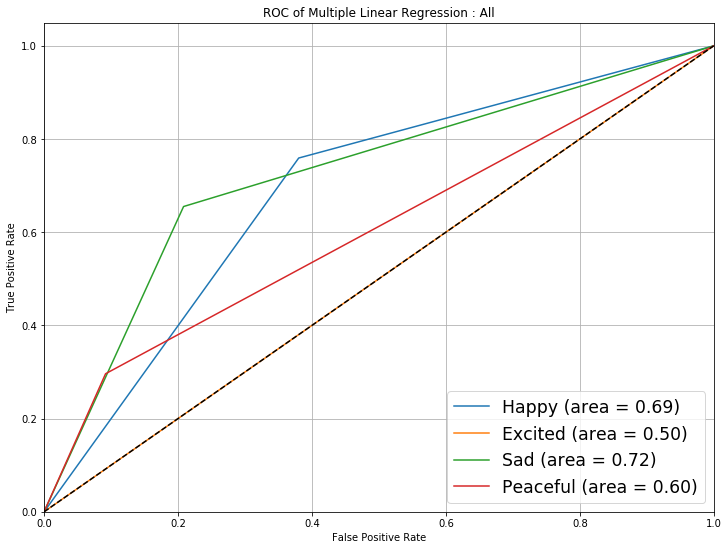

125


In [16]:
roc_mlr()

## Performance Measurement

In [17]:
def perform_measure(actual,predict):
    cm = confusion_matrix(actual,predict)
    print (cm)
    
    accuracy = accuracy_score(actual,predict)*100
    print ('Accuracy of our model is equal ' + str(round(accuracy,2)) + '%')
    
    measure = classification_report(actual,predict)
    print (measure)

## Group by Emotion

In [8]:
group_data = data.groupby('Emotion_songs').size()
group_dev_set = dev_set.groupby('Emotion_songs').size()
group_eva_set = eva_set.groupby('Emotion_songs').size()
group_dev_set


Emotion_songs
Excited      72
Happy       251
Peaceful     84
Sad         212
dtype: int64

## VA Values to Emotion Annotations and Plot

In [173]:
def VA_allplot():
    annotation = []
    plt.grid()
    for i in range(len(VA_all)):
        value_valence = VA_all[:,-2]
        value_arousal = VA_all[:,-1]
        if value_valence[i] > 0 and value_arousal[i] > 0 : # Happy
            an = 'Happy'
            happy_plot = plt.scatter(value_valence[i],value_arousal[i],
                                     color='green',label='Happy')  
            
        elif value_valence[i] > 0 and value_arousal[i] < 0 : # Peaceful
            an = 'Peaceful'
            peaceful_plot = plt.scatter(value_valence[i],value_arousal[i],
                                        color='blue',label='Peaceful')      
            
        elif value_valence[i] < 0 and value_arousal[i] > 0 : # Angry
            an = 'Excited'
            excited_plot = plt.scatter(value_valence[i],value_arousal[i],
                                       color='red',label='Excited')
            
        elif value_valence[i] < 0 and value_arousal[i] < 0 : # Sad
            an = 'Sad'
            sad_plot = plt.scatter(value_valence[i],value_arousal[i],
                                   color='black',label='Sad')
        
            
        else :
            print ('None')
        
        annotation.append(an)
    plt.legend(handles=[happy_plot,excited_plot,sad_plot,peaceful_plot],
               fontsize='large',loc = 2) 
    #plt.figure(figsize=(15,12))
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.axvline(x=0, ymin=0,ymax=1,color = 'black',lw=1)
    plt.axhline(y=0, xmin=0,xmax=1,color = 'black',lw=1)
    plt.title('VA Model')
    plt.xlabel('Valence')
    plt.ylabel('Arousal')
    
    #return annotation
   


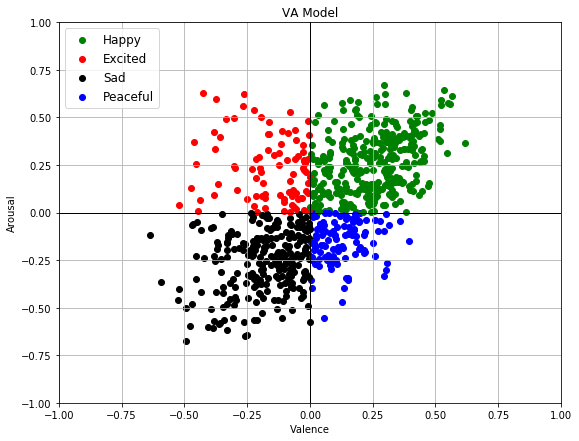

In [174]:
VA_allplot()

## Multiple Regression

In [43]:
def valence_test():
    regressor= LinearRegression()
    regressor.fit(X_train_no_all,y_val_train)
    y_valence = regressor.predict(X_test_no_all)
    valence = pd.DataFrame(y_valence)
    with open('Valence_test_mfcc5.csv','wb') as th :   ### Write to .csv file ###
        th = csv.writer(th)
        th.writerow(['Valence'])
        th.writerows(y_valence)
    return y_valence

def arousal_test():
    regressor= LinearRegression()
    regressor.fit(X_train_no_all,y_arou_train)
    y_arousal = regressor.predict(X_test_no_all)
    arousal = pd.DataFrame(y_arousal)
    with open('Arousal_test_mfcc5.csv','wb') as th :   ### Write to .csv file ###
        th = csv.writer(th)
        th.writerow(['Arousal'])
        th.writerows(y_arousal)
    return y_arousal

In [ ]:
valence_test()
arousal_test()

## Multiple Regression R-squared and so on ###

In [9]:
def MLR_arousal(train_x,train_y,test_x):
    regressor = LinearRegression()
    regressor.fit(train_x,train_y)
    y_pred = regressor.predict(test_x)

    plt.figure(figsize=(7,5))
    plt.scatter(eva_set.Arousal_values,regressor.predict(test_x))
    plt.xlabel('Arousal values (Evaluation)')
    plt.ylabel('Arousal values (Predict)')
    plt.grid()
    
    X1 = stm.add_constant(train_x)
    result = stm.OLS(train_y, X1).fit()
    
    print ('R-square of Arousal : ',result.rsquared), ('Adjust R-square of Arousal : ',result.rsquared_adj)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_arou_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_arou_test, y_pred))  
    print ('Variance score:',metrics.r2_score(y_arou_test,y_pred))
    print(result.summary())


def MLR_valence(train_x,train_y,test_x):
    regressor = LinearRegression()
    regressor.fit(train_x,train_y)
    y_pred = regressor.predict(test_x)

    plt.figure(figsize=(7,5))
    plt.scatter(eva_set.Valence_values,regressor.predict(test_x))
    plt.xlabel('Valence values (Evaluation)')
    plt.ylabel('Valence values (Predict)')
    plt.grid()
    
    X1 = stm.add_constant(train_x)
    result = stm.OLS(train_y, X1).fit()
    
    print ('R-square of Valence : ',result.rsquared),('Adjust R-square of Valence : '
                                                      ,result.rsquared_adj)
    print('Mean Absolute Error:', 
          metrics.mean_absolute_error(y_arou_test, y_pred))  
    
    print('Mean Squared Error:', 
          metrics.mean_squared_error(y_arou_test, y_pred))  
    
    print ('Variance score:',
           metrics.r2_score(y_arou_test,y_pred)) 
    
    print(result.summary())
    


('R-square of Arousal : ', 0.5255437491180134) ('Adjust R-square of Arousal : ', 0.5137413548174665)
('Mean Absolute Error:', 0.17454760538868283)
('Mean Squared Error:', 0.04209660783051762)
('Variance score:', 0.47003711214641586)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     44.53
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           2.78e-87
Time:                        14:13:58   Log-Likelihood:                 108.16
No. Observations:                 619   AIC:                            -184.3
Df Residuals:                     603   BIC:                            -113.5
Df Model:                          15                                         
Covariance Type:            nonrobust                   

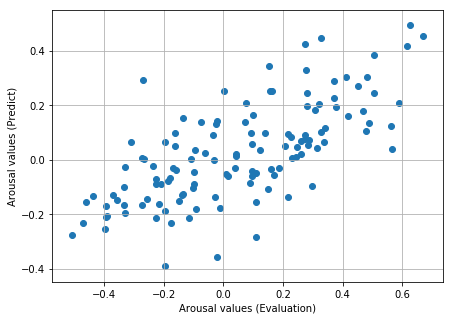

In [10]:
MLR_arousal(X_train_all,y_arou_train,X_test_all)

## Results of Valence Arousal for each features ##

In [11]:
va_test = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Va_test1.csv') #Name is called VA_test1
va_test_nopitch = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Va_test2.csv') #Name is called VA_test2
va_test_notempo = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Va_test3.csv') #Name is called VA_test3
va_test_nopitchtempo = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Va_test4.csv') #Name is called VA_test4

va_test_all = va_test.iloc[:,:].values #Name is called VA_test_1
va_test_no_pitch = va_test_nopitch.iloc[:,:].values #Name is called VA_test_2
va_test_no_tempo = va_test_notempo.iloc[:,:].values #Name is called VA_test_3
va_test_no_pitch_tempo = va_test_nopitchtempo.iloc[:,:].values #Name is called VA_test_4




## Plot Linear Regression line of Valence with Evaluation : Predict ##

In [15]:
def va_va1():
    va_va1 = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/va_va1.csv')
    x = va_va1.iloc[:,:-1].values
    y = va_va1.iloc[:,1].values


    regressor = LinearRegression()
    regressor.fit(x,y)
    #y_pred = regressor.predict(X_test)
    plt.figure(figsize=(7,5))
    plt.plot(x,regressor.predict(x),color='red')
    plt.scatter(x,y)    
    plt.xlabel('Valence values (Evaluation)')
    plt.ylabel('Valence values (Predict)')
    plt.title('$R^2$ = 11.71%, MSE = 0.058')
    plt.grid()

### Plot Linear Regression Arousal with Evaluation : Predict   
def ar_ar1():
    ar_ar1 = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/ar_ar1.csv')
    x = ar_ar1.iloc[:,:-1].values
    y = ar_ar1.iloc[:,1].values


    regressor = LinearRegression()
    regressor.fit(x,y)
    #y_pred = regressor.predict(X_test)
    plt.figure(figsize=(7,5))
    plt.plot(x,regressor.predict(x),color='red')
    plt.scatter(x,y)    
    plt.xlabel('Arousal values (Evaluation)')
    plt.ylabel('Arousal values (Predict)')
    plt.title('$R^2$ = 52.55%, MSE = 0.042')
    plt.grid()


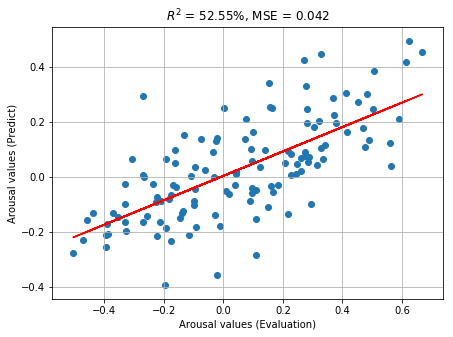

In [16]:
ar_ar1()

# Part Thai Songs #

## Results of Valence Arousal Thai songs for each features ##

In [23]:
va_th = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_th1.csv') #va_th1
va_th_nopitch = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_th2.csv') #va_th2
va_th_notempo = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_th3.csv') #va_th3
va_th_nopitchtempo = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/VA_values_th4.csv') #va_th4


VA_th_all = va_th.iloc[:,:].values #va_th_1
VA_th_no_pitch = va_th_nopitch.iloc[:,:].values #va_th_2
VA_th_no_tempo = va_th_notempo.iloc[:,:].values #va_th_3
VA_th_no_pitchtempo = va_th_nopitchtempo.iloc[:,:].values #va_th_4

VA_th_normal_all = pd.DataFrame(preprocessing.minmax_scale(VA_th_all))
VA_th_normal_no_pitch = pd.DataFrame(preprocessing.minmax_scale(VA_th_no_pitch))
VA_th_normal_no_tempo = pd.DataFrame(preprocessing.minmax_scale(VA_th_no_tempo))
VA_th_normal_no_pitchtempo = pd.DataFrame(preprocessing.minmax_scale(VA_th_no_pitchtempo))

VA_th_normal_all = VA_th_normal_all.iloc[:,:].values
VA_th_normal_no_pitch = VA_th_normal_no_pitch.iloc[:,:].values
VA_th_normal_no_tempo = VA_th_normal_no_tempo.iloc[:,:].values
VA_th_normal_no_pitchtempo = VA_th_normal_no_pitchtempo.iloc[:,:].values

emotion_th = pd.read_csv('C:\\Users\\TEMP\\Anaconda2\\Project_Master/Emotions_th_MLR.csv')
emotion_th_all = emotion_th.iloc[:,:].values

None
[[ 0 39  1  3]
 [ 0 63  1  0]
 [ 0  3  0  0]
 [ 0  8  4  3]]
Accuracy of our model is equal 52.8%
             precision    recall  f1-score   support

    Excited       0.00      0.00      0.00        43
      Happy       0.56      0.98      0.71        64
   Peaceful       0.00      0.00      0.00         3
        Sad       0.50      0.20      0.29        15

avg / total       0.35      0.53      0.40       125



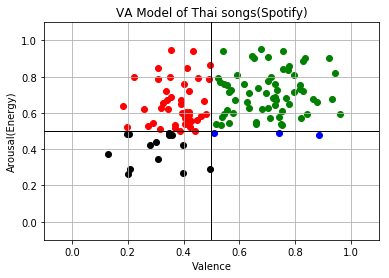

In [72]:
perform_measure(annotations_spotify(VA_spotify),emotion_th_all[:,-1])

In [44]:
def roc_mlr_th():
    
    n_classes = 4
    emo_spotify = pd.read_csv('Emotions_th_MLR.csv')
    emo_spotify_ref = emo_spotify.iloc[:,-5].values
    emo_spotify_model = emo_spotify.iloc[:,-4].values


    y_pred_mlr_bi = label_binarize(emo_spotify_model, classes=['Happy',
                                                               'Excited',
                                                               'Sad',
                                                               'Peaceful'])
    y_emo_test_bi = label_binarize(emo_spotify_ref, classes=['Happy',
                                                             'Excited',
                                                             'Sad',
                                                             'Peaceful'])

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_emo_test_bi[:, i], y_pred_mlr_bi[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_emo_test_bi.ravel(), y_pred_mlr_bi.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    #Plot median line
    plt.figure(figsize=(12,9))
    
    #Plot Roc of emotions
    plt.plot(fpr[0], tpr[0], label='Happy (area = {1:0.2f})'
                                   ''.format(i, roc_auc[0]))
    plt.plot(fpr[1], tpr[1], label='Excited (area = {1:0.2f})'
                                   ''.format(i, roc_auc[1]))
    plt.plot(fpr[2], tpr[2], label='Sad (area = {1:0.2f})'
                                   ''.format(i, roc_auc[2]))
    plt.plot(fpr[3], tpr[3], label='Peaceful (area = {1:0.2f})'
                                   ''.format(i, roc_auc[3]))
    
    plt.grid()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of Thai Music  : All')
    plt.legend(loc="lower right", fontsize='xx-large')
    plt.show()

    print len(emo_mediaeval_model)

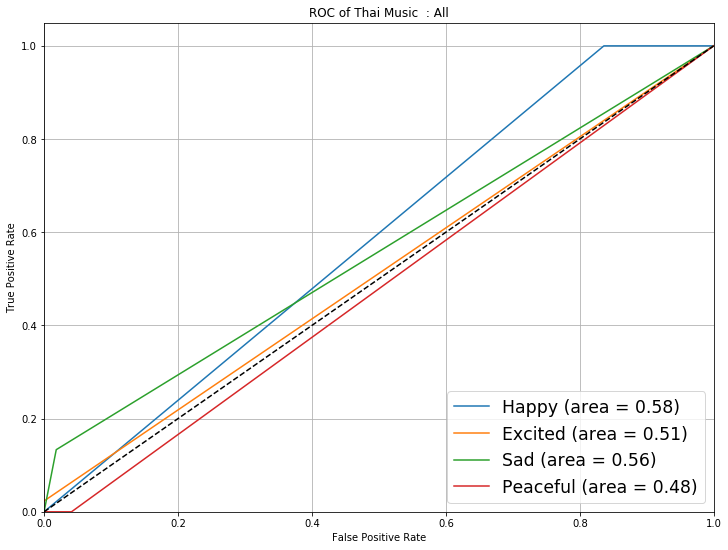

NameError: global name 'emo_mediaeval_model' is not defined

In [45]:
roc_mlr_th()

## Test Thai Song

In [ ]:
def predict_emo_th() :
    for i in range(len(X_thai)):
    result_th = classifier.predict([X_thai_nor[i]])
    print (result_th)

## Multiple linear regression with Thai songs for each features ##

In [30]:
def valence_th(x_train,y_train,x_test,csv_filename):
    regressor_th = LinearRegression()
    regressor_th.fit(x_train,y_train) #Example X_train4 : Valence of MediaEval
    y_valence_th = regressor_th.predict(x_test)
    #thizip = zip(valence_th(),arousal_th())
    with open(csv_filename,'wb') as th :
        th = csv.writer(th)
        th.writerow(['Valence'])
        th.writerows(y_valence_th)


def arousal_th(x_train,y_train,x_test,csv_filename):
    regressor_th = LinearRegression()
    regressor_th.fit(x_train,y_train) #Example X_train4 : arousal of MediaEval
    y_arousal_th = regressor_th.predict(x_test)
    #thizip = zip(valence_th(),arousal_th())
    with open(csv_filename,'wb') as th :
        th = csv.writer(th)
        th.writerow(['Arousal'])
        th.writerows(y_arousal_th)


In [18]:
valence_th(X_train_no_pitchtempo,y_val_train,X_thai_no_pitchtempo,
           'Valence_values_th4.csv')
arousal_th(X_train_no_pitchtempo,y_arou_train,X_thai_no_pitchtempo,
           'Arousal_values_th4.csv')

## K-NN ##

In [6]:
def Knn_classify(train_x,train_y,test_x,labelname):
    scores = []
    error1 = []
    k_range = range(1, 31)
    for k in k_range:
        classifier_KNN = KNeighborsClassifier(n_neighbors=k,metric= 'minkowski',
                                              p=2,weights='uniform')
        classifier_KNN.fit(train_x,train_y)
        y_pred_KNN = classifier_KNN.predict(test_x)
        scores.append(metrics.accuracy_score(y_emo_test, y_pred_KNN))
        error1.append(np.mean(y_pred_KNN != y_emo_test))
        scores_array = np.asarray(scores)
        
    scores_array = scores_array*100
        
    plt.grid()
    plt.plot(k_range,scores_array , label = labelname)
    
    plt.xlabel('No. of K for KNN')
    plt.ylabel('Accuracy of KNN (%)')
    plt.grid()
    plt.legend()
    
    plt.plot
    
    print (scores_array)
    return scores 


# Measurement Performance of K-NN

In [33]:
def mesasure_KNN(k,train_x,train_y,test_x,y_emo_test):
    
    n_classes = 4
    classifier_KNN = KNeighborsClassifier(n_neighbors=k,metric= 'minkowski',
                                          p=2,weights='uniform')
    y_score = classifier_KNN.fit(train_x,train_y)
    y_pred_KNN = classifier_KNN.predict(test_x)
    perform_measure(y_emo_test,y_pred_KNN)
    
    
    y_pred_KNN_bi = label_binarize(y_pred_KNN, classes=['Happy',
                                                        'Excited',
                                                        'Sad',
                                                        'Peaceful'])
    y_emo_test_bi = label_binarize(y_emo_test, classes=['Happy',
                                                        'Excited',
                                                        'Sad',
                                                        'Peaceful'])
    
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_emo_test_bi[:, i],
                                      y_pred_KNN_bi[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_emo_test_bi.ravel(),
                                              y_pred_KNN_bi.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    #Plot median line
    plt.figure(figsize=(12,9))
    #plt.plot(fpr["micro"], tpr["micro"],label='ROC average (area = {0:0.2f})'
               #''.format(roc_auc["micro"]))
    
    #Plot Roc of emotions
    plt.plot(fpr[0], tpr[0], label='Happy (area = {1:0.2f})'
                                   ''.format(i, roc_auc[0]))
    plt.plot(fpr[1], tpr[1], label='Excited (area = {1:0.2f})'
                                   ''.format(i, roc_auc[1]))
    plt.plot(fpr[2], tpr[2], label='Sad (area = {1:0.2f})'
                                   ''.format(i, roc_auc[2]))
    plt.plot(fpr[3], tpr[3], label='Peaceful (area = {1:0.2f})'
                                   ''.format(i, roc_auc[3]))
    
    plt.grid()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC of Western Music : K_14')
    plt.legend(loc="lower right", fontsize='xx-large')
    plt.show()

    
    print (fpr,tpr)
    print (y_pred_KNN_bi)
    print (y_pred_KNN)

[31.2 36.8 32.  32.  33.6 30.4 34.4 34.4 31.2 34.4 36.  35.2 38.4 35.2
 35.2 36.  37.6 34.4 36.8 36.  38.4 32.8 36.8 36.  37.6 37.6 36.8 36.
 36.8 36.8]
[42.4 40.8 39.2 40.  44.  45.6 44.  42.4 42.4 40.  44.  44.  42.4 40.8
 44.  43.2 43.2 44.  42.4 41.6 41.6 40.  42.4 43.2 43.2 44.8 44.8 45.6
 45.6 44. ]
[35.2 35.2 38.4 40.  36.  35.2 36.8 40.  35.2 36.8 43.2 41.6 40.8 40.8
 40.8 38.4 36.8 34.4 37.6 35.2 35.2 35.2 36.8 37.6 35.2 38.4 36.  36.8
 36.8 36.8]
[40.8 40.8 44.8 43.2 47.2 45.6 49.6 46.4 45.6 48.  48.8 52.  52.  55.2
 55.2 52.8 51.2 51.2 53.6 52.8 52.8 52.8 52.8 53.6 54.4 54.4 53.6 52.8
 52.  53.6]


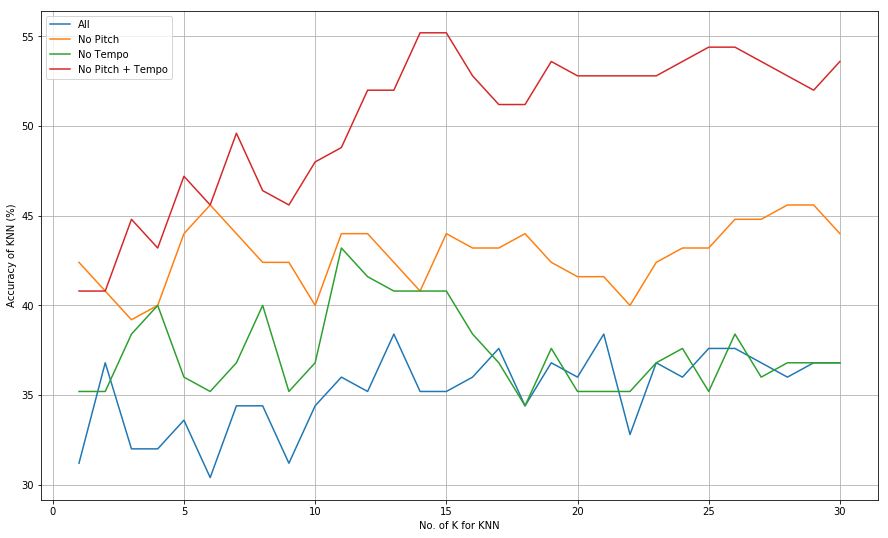

In [146]:
plt.figure(figsize=(15,9))
(Knn_classify(X_train_all,y_emo_train,X_test_all,'All'),
 Knn_classify(X_train_no_pitch,y_emo_train,X_test_no_pitch,'No Pitch'),
 Knn_classify(X_train_no_tempo,y_emo_train,X_test_no_tempo,'No Tempo'),
 Knn_classify(X_train_no_pitchtempo,y_emo_train,X_test_no_pitchtempo, 'No Pitch + Tempo'))

plt.grid()